# In this notebook I will use the "begining of path" to check the small lag correlations 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import numpy as np
import xesmf as xe
from   scipy.interpolate import griddata
import dask as dsk

import hvplot.xarray
import hvplot.pandas

from   cartopy import config
import cartopy.crs as ccrs
proj = ccrs.PlateCarree()
import cartopy.feature as cfeature

from scipy import stats
from scipy.stats import t

In [2]:
temp_5814= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_58-14.nc")
temp_1518= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_15-18_correct.nc")
temp_1923= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_19-23_correct.nc")

In [3]:
temp_ya = xr.concat([temp_5814, temp_1518, temp_1923], dim="time")
temp_ya 

<xarray.Dataset>
Dimensions:   (deptht: 38, lat: 180, lon: 170, time: 66)
Coordinates:
  * deptht    (deptht) float32 1.556 2.668 3.856 5.14 ... 370.7 411.8 457.6
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time      (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31
Data variables:
    votemper  (time, deptht, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

# Beginning path:

In [4]:
# Select the region (lat = -28 to -23, lon = -97 to -78)
begin_path = temp_ya.votemper.sel(lat=slice(-28, -23), lon=slice(263, 282))

# Find the index closest to 0 meters in the depth coordinate
depth_0_idx = abs(temp_ya.deptht - 0).argmin().item()

# Select the data at 200 meters depth
begin_path_0 = begin_path.isel(deptht=depth_0_idx)

# Average over the selected region
begin_path_avg_0m = begin_path_0.mean(dim=["lat", "lon"])
begin_path_avg_0m

<xarray.DataArray 'votemper' (time: 66)>
array([-0.01606606, -0.15437484,  0.21483509, -0.14152429, -0.26975727,
        0.08192404, -0.01928422,  0.3053232 , -0.24202515, -0.32776248,
        0.15913543,  0.11129618,  0.02453065, -0.22502483,  0.38427794,
       -0.25796458, -0.22098476, -0.56177634, -0.57135975,  0.3694442 ,
       -0.05209292,  0.60744804,  0.50035954,  0.08423958,  0.14091548,
       -0.24900617, -0.12131845, -0.21467365,  0.08277269,  0.15967329,
       -0.10239153, -0.1061519 , -0.0350819 , -0.10836336,  0.16649161,
        0.33701372,  0.02513026,  0.11296822, -0.12823446,  0.47214228,
       -0.22753398, -0.43324223,  0.1310071 ,  0.0820492 , -0.09724924,
        0.26648253, -0.16354193,  0.28495383,  0.45113462, -0.35563964,
        0.330725  ,  0.32018963, -0.63610804, -0.4361719 ,  0.4547995 ,
        0.05508656, -0.24164078, -0.08009963,  0.40237322, -0.06176567,
       -0.26050803, -0.11733222, -0.01313798, -0.22909588, -0.40699938,
        0.7665653 ], dtype=float32)
Coordinates:
    deptht   float32 1.556
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31

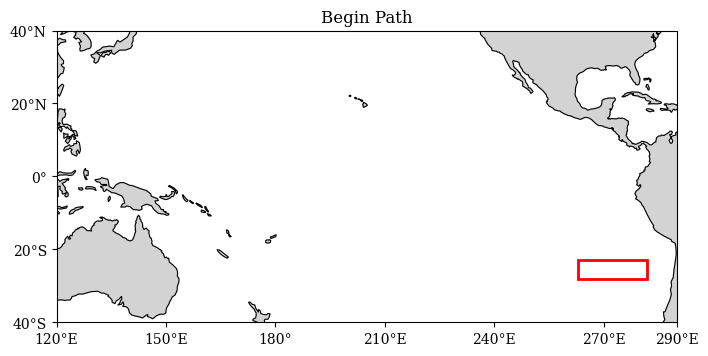

In [21]:
# Set font to serif
plt.rcParams['font.family'] = 'serif'

# Pacific-centered
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)})

# Set extent of axis:
ax.set_extent([120, 290, -40, 40], crs=ccrs.PlateCarree())

# Add land and coastlines
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor="black")

# Highlight the "Begin Path" (lat = -28 to -23, lon = -97 to -78, converted to 263-282)
region_lon_start, region_lon_end = 263, 282  # Converted from -97 to -78
region_lat_start, region_lat_end = -28, -23

# Add a red rectangle to highlight the "BP"
rect = Rectangle((region_lon_start, region_lat_start), 
                 region_lon_end - region_lon_start, 
                 region_lat_end - region_lat_start, 
                 linewidth=2, edgecolor='red', facecolor='none', 
                 transform=ccrs.PlateCarree())
ax.add_patch(rect)

# Set longitude ticks
ax.set_xticks([120, 150, 180, 210, 240, 270, 290], crs=ccrs.PlateCarree())
ax.set_xticklabels(["120°E", "150°E", "180°", "210°E", "240°E", "270°E", "290°E"])

# Set latitude ticks
ax.set_yticks([-40, -20, 0, 20, 40], crs=ccrs.PlateCarree())
ax.set_yticklabels(["40°S", "20°S", "0°", "20°N", "40°N"])

# **Remove inside gridlines
ax.grid(False)

# Add title
ax.set_title("Begin Path", fontsize=12)

# Show the plot
plt.show()

# Save figure
fig.savefig('location_begin_path.png', dpi=300, bbox_inches='tight')

# ------------------------------------------------------

# Time Series Interuption 

Text(0.5, 1.0, 'Average Temp Anomalie of Begin Path (ORAs)')

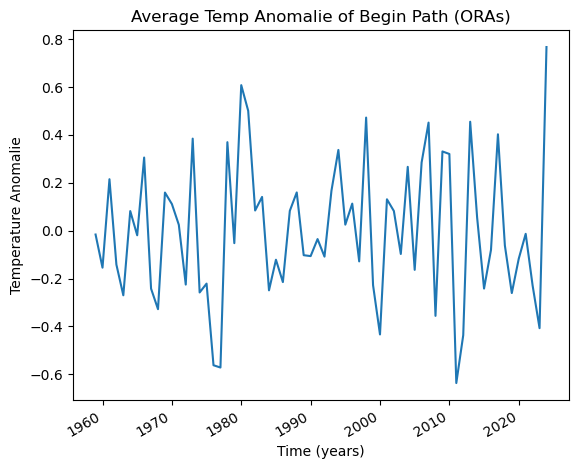

In [6]:
begin_path_avg_0m.plot()
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomalie')
plt.title('Average Temp Anomalie of Begin Path (ORAs)')

In [7]:
# To compare to EC-Earth data Select the time range 1958-2014
subset = begin_path_avg_0m.sel(time=slice("1958-01-01", "2014-12-31"))

# Print to check
print(subset)

<xarray.DataArray 'votemper' (time: 57)>
array([-0.01606606, -0.15437484,  0.21483509, -0.14152429, -0.26975727,
        0.08192404, -0.01928422,  0.3053232 , -0.24202515, -0.32776248,
        0.15913543,  0.11129618,  0.02453065, -0.22502483,  0.38427794,
       -0.25796458, -0.22098476, -0.56177634, -0.57135975,  0.3694442 ,
       -0.05209292,  0.60744804,  0.50035954,  0.08423958,  0.14091548,
       -0.24900617, -0.12131845, -0.21467365,  0.08277269,  0.15967329,
       -0.10239153, -0.1061519 , -0.0350819 , -0.10836336,  0.16649161,
        0.33701372,  0.02513026,  0.11296822, -0.12823446,  0.47214228,
       -0.22753398, -0.43324223,  0.1310071 ,  0.0820492 , -0.09724924,
        0.26648253, -0.16354193,  0.28495383,  0.45113462, -0.35563964,
        0.330725  ,  0.32018963, -0.63610804, -0.4361719 ,  0.4547995 ,
        0.05508656, -0.24164078], dtype=float32)
Coordinates:
    deptht   float32 1.556
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2014-12-31


Text(0.5, 1.0, 'Average Temp Anomalie of Begin Path (ORAs)')

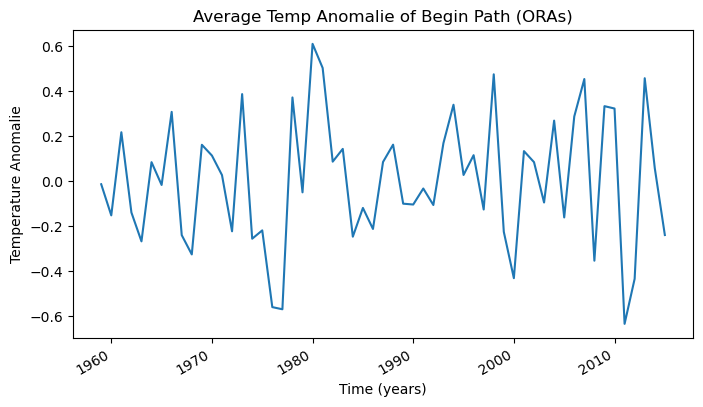

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
subset.plot()
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomalie')
plt.title('Average Temp Anomalie of Begin Path (ORAs)')

In [9]:
#I want to download the time line so i can use stats to compare EC-Earth and ORAs 

In [10]:
output_file = "ORAs_avg_beginning_path_0m_1958-2014.nc"
subset.to_netcdf("/nobackup/users/ommeren/ORAs_avg_beginning_path_0m_1958-2014.nc")

In [11]:
# I am missing the upward trend (Which is visable in EC-Earth. 
#I want to check if i plot another area if the upward trend is there

### With another area to see if there is a upward trend in other areas (change values to examine)

In [12]:
# Select the region (lat = -28 to -23, lon = -97 to -78)
#other_area = temp_ya.votemper.sel(lat=slice(-5,5), lon=slice(263, 282))
other_area = temp_ya.votemper.sel(lat=slice(-20,-17), lon=slice(230, 240))

# Find the index closest to 0 meters in the depth coordinate
#depth_0_idx = abs(temp_ya.deptht - 0).argmin().item()
depth_0_idx = abs(temp_ya.deptht - 200).argmin().item()

# Select the data at 200 meters depth
other_area_0 = other_area.isel(deptht=depth_0_idx)

# Average over the selected region
other_area_avg_0m = other_area_0.mean(dim=["lat", "lon"])
other_area_avg_0m

<xarray.DataArray 'votemper' (time: 66)>
array([-0.2321914 , -0.0115853 ,  0.05581849,  0.05202891,  0.22425766,
        0.3259533 ,  0.08660653, -0.14170316,  0.3344556 ,  0.4877278 ,
        0.25401407, -0.55077714, -0.24128583, -0.01597207, -0.15856947,
       -0.21412723,  0.25180027,  0.2465257 , -0.0591116 , -0.65684384,
       -1.0253946 , -1.1782058 , -0.5686697 , -0.44289348, -0.08336697,
       -0.22105046,  0.28156   ,  0.08868542,  0.08535678, -0.24539661,
       -0.17230211, -0.12413178, -0.2522073 , -0.18914063, -0.05967223,
        0.34317443,  0.18173899,  0.17854105,  0.60607034,  0.587184  ,
        0.40093976,  0.3593542 , -0.07751859, -0.18232904,  0.0648283 ,
        0.14457335,  0.146201  ,  0.33946183,  0.38391   ,  0.35959944,
        0.19572385, -0.12777029, -0.21916498,  0.40653446, -0.02127698,
       -0.02280858,  0.02282104,  0.05522079, -0.12990107, -0.26035914,
        0.3350394 , -0.10220706, -0.06717288,  0.24572645,  0.13048063,
       -0.20682512], dtype=float32)
Coordinates:
    deptht   float32 199.8
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31

Text(0.5, 1.0, 'Average Temp Anomalie near Equator (ORAs)')

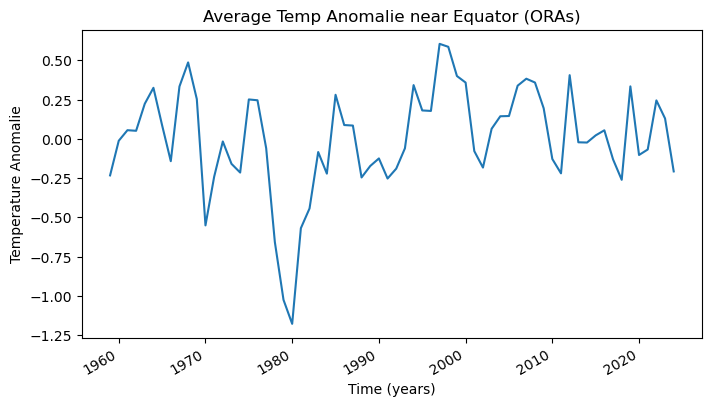

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
other_area_avg_0m.plot()
plt.xlabel('Time (years)')
plt.ylabel('Temperature Anomalie')
plt.title('Average Temp Anomalie near Equator (ORAs)')

In [14]:
# Select the region (lat = -28 to -23, lon = -97 to -78)
begin_path = temp_ya.votemper.sel(lat=slice(-28, -23), lon=slice(263, 282))

# Find the index closest to 0 meters in the depth coordinate
depth_0_idx = abs(temp_ya.deptht - 0).argmin().item()

# Select the data at 200 meters depth
begin_path_0 = begin_path.isel(deptht=depth_0_idx)

# Average over the selected region
begin_path_avg_0m = begin_path_0.mean(dim=["lat", "lon"])
begin_path_avg_0m

<xarray.DataArray 'votemper' (time: 66)>
array([-0.01606606, -0.15437484,  0.21483509, -0.14152429, -0.26975727,
        0.08192404, -0.01928422,  0.3053232 , -0.24202515, -0.32776248,
        0.15913543,  0.11129618,  0.02453065, -0.22502483,  0.38427794,
       -0.25796458, -0.22098476, -0.56177634, -0.57135975,  0.3694442 ,
       -0.05209292,  0.60744804,  0.50035954,  0.08423958,  0.14091548,
       -0.24900617, -0.12131845, -0.21467365,  0.08277269,  0.15967329,
       -0.10239153, -0.1061519 , -0.0350819 , -0.10836336,  0.16649161,
        0.33701372,  0.02513026,  0.11296822, -0.12823446,  0.47214228,
       -0.22753398, -0.43324223,  0.1310071 ,  0.0820492 , -0.09724924,
        0.26648253, -0.16354193,  0.28495383,  0.45113462, -0.35563964,
        0.330725  ,  0.32018963, -0.63610804, -0.4361719 ,  0.4547995 ,
        0.05508656, -0.24164078, -0.08009963,  0.40237322, -0.06176567,
       -0.26050803, -0.11733222, -0.01313798, -0.22909588, -0.40699938,
        0.7665653 ], dtype=float32)
Coordinates:
    deptht   float32 1.556
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31

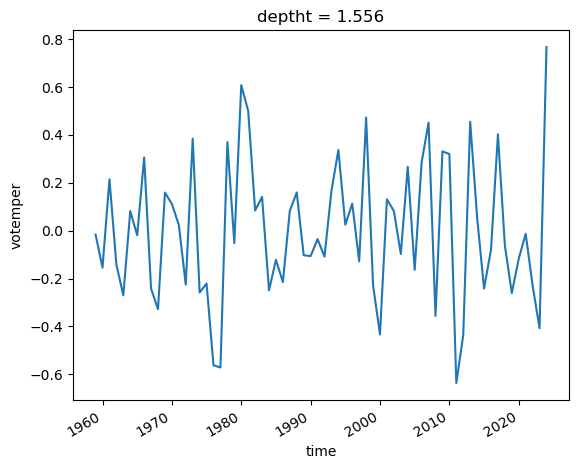

In [15]:
begin_path_avg_0m.plot()

# Check for PDO relation (14-2-25)

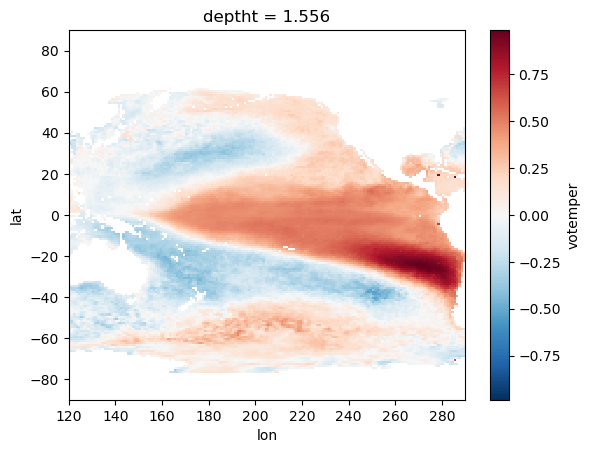

In [33]:
xr.corr(begin_path_avg_0m, temp_ya.votemper.sel(deptht = 0, method = "nearest"), dim = "time").plot()

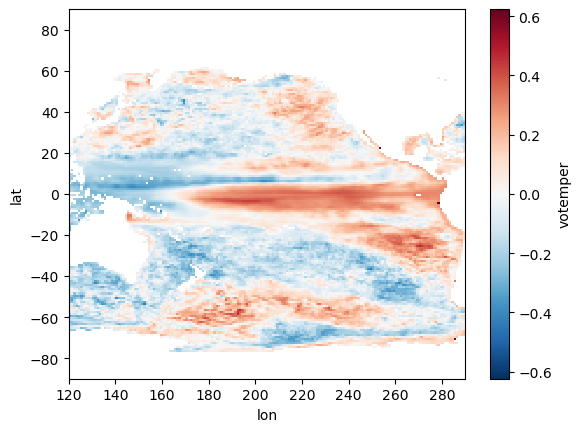

In [34]:
xr.corr(begin_path_avg_0m, temp_ya.votemper.sel(deptht = 100, method = "nearest"), dim = "time").plot()

# ------------------------------------------------------

# Here i will make cross sections in small steps to follow signal

### **Change the lon in this section!**

# check lon section

In [11]:
cross_section_270 = temp_ya.votemper.sel(lon=270, method = 'nearest')
cross_section_270

<xarray.DataArray 'votemper' (time: 66, deptht: 38, lat: 180)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lon      float64 270.5
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31

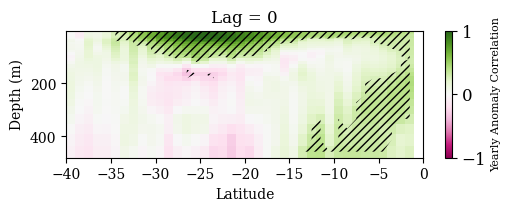

In [12]:
# Set font
plt.rcParams['font.family'] = 'serif'

# Define the lags to analyze:
lags = range(0, 1)  

# Create a figure to hold multiple plots
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Ensure axes doesn't overlap
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    if lag == 0:
        # Special case for lag = 0 
        lag_corr = xr.corr(
            begin_path_avg_0m.isel(time=slice(None, None)),  
            cross_section_270.isel(time=slice(None, None)).sel(lat=slice(-40, 0)),       
            dim="time"
        )
    else:
        # Standard lag correlation calculation
        lag_corr = xr.corr(
            begin_path_avg_0m.isel(time=slice(abs(lag), None)),
            cross_section_270.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0)),
            dim="time"
        )

    # Number of time steps in the correlation analysis
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = lag_corr * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr**2)

    # Degrees of freedom
    df = n_time - 2
 
    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df, 
        kwargs={"loc": 0, "scale": 1}
    ) * 2  # Multiply by 2 for two-tailed test

    # Threshold for significance
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customization:
    ax.invert_yaxis()  
    ax.set_title(f"Lag = {lag}", fontsize=12)
    ax.set_xlabel("Latitude", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Colorbar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()

# Save figure
fig.savefig('Cross_Section_270*_lag0.png', dpi=300, bbox_inches='tight')
   


### **Change the lat in this section!**

# Check lat section

In [13]:
cross_section_25 = temp_ya.votemper.sel(lat=-25, method = 'nearest')
cross_section_25

<xarray.DataArray 'votemper' (time: 66, deptht: 38, lon: 170)>
array([[[        nan,         nan,         nan, ...,  0.28883934,
         -0.3441925 ,         nan],
        [        nan,         nan,         nan, ...,  0.29158974,
         -0.3414173 ,         nan],
        [        nan,         nan,         nan, ...,  0.2940693 ,
         -0.33928108,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.10249329,
          0.12827969,         nan],
        [        nan,         nan,         nan, ..., -0.05956841,
          0.18198395,         nan],
        [        nan,         nan,         nan, ..., -0.01262903,
          0.20651627,         nan]],

       [[        nan,         nan,         nan, ..., -0.03742981,
         -0.60907745,         nan],
        [        nan,         nan,         nan, ..., -0.03536797,
         -0.6032429 ,         nan],
        [        nan,         nan,         nan, ..., -0.03363609,
         -0.59786034,         nan],
...
        [        nan,         nan,         nan, ..., -0.03619862,
         -0.18805408,         nan],
        [        nan,         nan,         nan, ..., -0.03527069,
         -0.17467403,         nan],
        [        nan,         nan,         nan, ..., -0.02930975,
         -0.13844776,         nan]],

       [[        nan,         nan,         nan, ...,  0.863821  ,
          0.9211674 ,         nan],
        [        nan,         nan,         nan, ...,  0.866354  ,
          0.92790794,         nan],
        [        nan,         nan,         nan, ...,  0.86831474,
          0.93518066,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.01163483,
          0.15857601,         nan],
        [        nan,         nan,         nan, ...,  0.00946045,
          0.18451214,         nan],
        [        nan,         nan,         nan, ...,  0.04733944,
          0.19466877,         nan]]], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    lat      float64 -24.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31

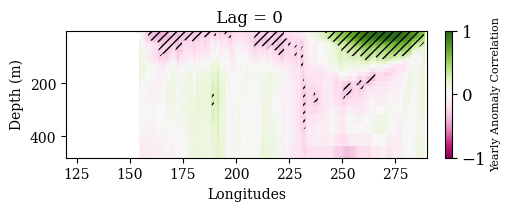

In [15]:
# Font
plt.rcParams['font.family'] = 'serif'


# Define the lags 
lags = range(0, 1)  

# Create a figure to hold multiple plots
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Axis
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    if lag == 0:
        # Special case for lag = 0 
        lag_corr = xr.corr(
            begin_path_avg_0m.isel(time=slice(None, None)),  
            cross_section_25.isel(time=slice(None, None)),       
            dim="time"
        )
    else:
        # Standard lag correlation calculation
        lag_corr = xr.corr(
            begin_path_avg_0m.isel(time=slice(abs(lag), None)),
            cross_section_25.shift(time=-lag).isel(time=slice(None, -abs(lag))),
            dim="time"
        )

    # Number of time steps 
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = lag_corr * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr**2)

    # Degrees of freedom
    df = n_time - 2
 
    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df, 
        kwargs={"loc": 0, "scale": 1}
    ) * 2  

    # Threshold for significance    
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance 
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    ax.invert_yaxis()  # Depth increases downwards
    ax.set_title(f" Lag = {lag}", fontsize=12)
    ax.set_xlabel("Longitudes", fontsize=10)
    ax.set_ylabel("Depth (m)", fontsize=10)

    # Colorbar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(8)
    colorbar.ax.tick_params(labelsize=12)

plt.show()

# Save figure
fig.savefig('Cross_Section_-25*_lag0.png', dpi=300, bbox_inches='tight')


# Check different depths in Section

### **Change Depth**

In [19]:
section_150 = temp_ya.votemper.sel(deptht = 150, method = "nearest")
section_150

<xarray.DataArray 'votemper' (time: 66, lat: 180, lon: 170)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
    deptht   float32 147.4
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31

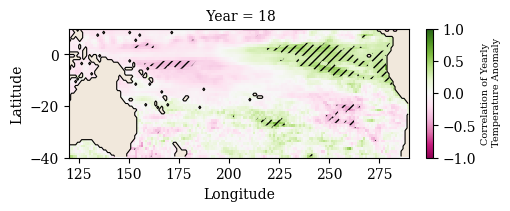

In [24]:
# Set Font
plt.rcParams['font.family'] = 'serif'

# Define the lags to analyze
lags = range(18,19,10) 

# Create a figure to hold multiple plots
fig, axes = plt.subplots(len(lags), 1, figsize=(5, 2 * len(lags)), constrained_layout=True)

# Axes
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    # Calculate correlation for the current lag
    lag_corr = xr.corr(
        begin_path_avg_0m.isel(time=slice(abs(lag), None)),
        section_150.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 10)),
        dim="time"
    )

    # Time steps
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size
    df = n_time - 2

    # Calculate the t-statistic
    t_stat = lag_corr * np.sqrt(df) / np.sqrt(1 - lag_corr**2)

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df, 
        kwargs={"loc": 0, "scale": 1}
    ) * 2

    # Significance mask
    alpha = 0.05
    significance_mask = p_values < alpha

    # Plot the correlation coefficients
    ax = axes[i]
    corr_plot = lag_corr.plot(
        cbar_kwargs={'label': 'Correlation of Yearly\n Temperature Anomaly'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Add landmasses 
    land_mask = np.isnan(lag_corr)
    land_mask.plot.contourf(
        ax=ax,
        levels=[0.5, 1],
        colors=["#D2B48C"],  # Tan fill
        alpha=0.3,
        add_colorbar=False,
        zorder=0
    )
    land_mask.plot.contour(
        ax=ax,
        levels=[0.5],
        colors="black",
        linewidths=0.8,
        zorder=1
    )

    # Overlay significance
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1],
        colors="none",
        hatches=["////"],
        add_colorbar=False,
        ax=ax,
        zorder=2
    )

    # Customize the plot
    ax.set_title(f" Year = {lag}", fontsize=10)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)

    # Adjust colorbar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(7)
    colorbar.ax.tick_params(labelsize=10)

plt.show()

# Save high-quality figure
fig.savefig('Section_100m_lag18_with_continents.png', dpi=300, bbox_inches='tight')


In [ ]:
# Define the lags to analyze
lags = range(-10, 25)  # Example: from -10 to +10

# Create a figure to hold multiple plots if needed
fig, axes = plt.subplots(len(lags), 1, figsize=(18, 5 * len(lags)), constrained_layout=True)

# Ensure axes is iterable for single-lag cases
if len(lags) == 1:
    axes = [axes]

for i, lag in enumerate(lags):
    # Calculate correlation for the current lag
    lag_corr = xr.corr(
        begin_path_2_avg_0m.isel(time=slice(abs(lag), None)),
        section_100.shift(time=-lag).isel(time=slice(None, -abs(lag))).sel(lat=slice(-40, 0)),
        dim="time"
    )

    # Number of time steps in the correlation analysis
    n_time = begin_path_avg_0m.isel(time=slice(abs(lag), None)).time.size

    # Calculate the t-statistic
    t_stat = lag_corr * np.sqrt(n_time - 2) / np.sqrt(1 - lag_corr**2)

    # Degrees of freedom
    df = n_time - 2

    # Calculate the two-tailed p-value
    p_values = xr.apply_ufunc(
        stats.t.sf, np.abs(t_stat), df, 
        kwargs={"loc": 0, "scale": 1}
    ) * 2  # Multiply by 2 for two-tailed test

    # Threshold for significance (e.g., p < 0.05)
    alpha = 0.05
    significance_mask = p_values < alpha

 # Plot the correlation coefficients with significance overlay
    ax = axes[i]
    lag_corr.plot(
        cbar_kwargs={'label': 'Yearly Anomaly Correlation'}, 
        vmin=-1.0, vmax=1.0, cmap="PiYG", ax=ax
    )

    # Overlay significance (mask where p < alpha)
    significance_mask.where(significance_mask).plot.contourf(
        levels=[0.5, 1], colors="none", hatches=["////"], add_colorbar=False, ax=ax
    )

    # Customize the plot
    #ax.invert_yaxis()  # Depth increases downwards
    ax.set_title(f" Yearly Temperature Anomaly Correlation beginning and depth 100 (Lag = {lag})", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=14)
    ax.set_ylabel("Latitude", fontsize=14)

    # Adjust colorbar appearance
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(14)
    colorbar.ax.tick_params(labelsize=14)

plt.show()